In [1]:
from ipynb.fs.defs.pipeline import pipeline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
savefolder = 'data/'
datafile = savefolder + 'data.pkl'

In [5]:
def get_image(ip = '131.155.243.218', plot = True):
    url = 'http://' + ip + '/live'
    cap = cv2.VideoCapture(url)
    ret, img = cap.read()
    cap.release()
    if plot:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    return img

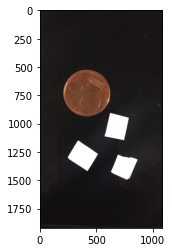

In [54]:
img = get_image()

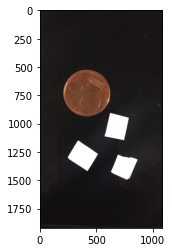

Accept: [y]  Quit: [q] y
How many samples? 3


slic data


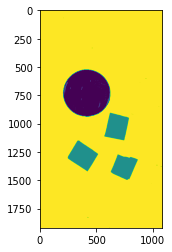

background


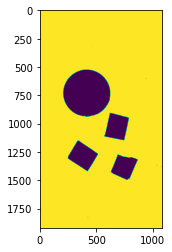

foreground


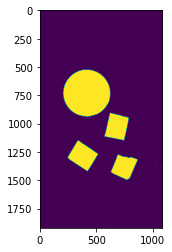

Correct? [y] y
Sample name TNO_C-301


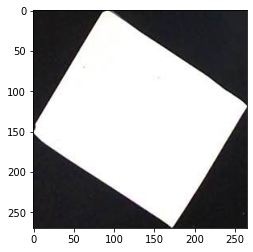

{'sample name': 'TNO_C-301', 'piece': 0, 'original': 'data/TNO_C-301_unedited.png', 'pixels': 38665, 'ref pixels': 133120, 'region': <skimage.measure._regionprops.RegionProperties object at 0x7f21711eee80>}


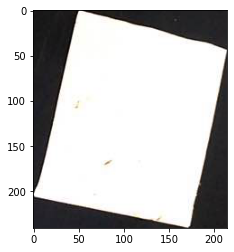

{'sample name': 'TNO_C-301', 'piece': 1, 'original': 'data/TNO_C-301_unedited.png', 'pixels': 36038, 'ref pixels': 133120, 'region': <skimage.measure._regionprops.RegionProperties object at 0x7f2171222df0>}


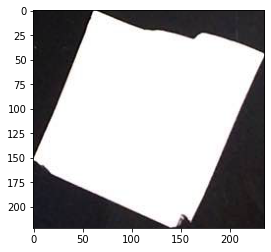

{'sample name': 'TNO_C-301', 'piece': 2, 'original': 'data/TNO_C-301_unedited.png', 'pixels': 32252, 'ref pixels': 133120, 'region': <skimage.measure._regionprops.RegionProperties object at 0x7f218024dd90>}


Accept? [y] y


Accepted!


In [55]:
def get_samples(img = None):
    if img is None:
        img = get_image()
    else:     
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    response = input(prompt = "Accept: [y]  Quit: [q]")
    if response == 'q':
        return 
    N_samples = int(input(prompt = "How many samples?"))
    regions, labels = pipeline(img,
                               compactness = 2,
                               n_segments = 4,
                               sigma = 0
                              )
    correct = bool(input(prompt = "Correct? [y]") == 'y')
    if correct:
        df = pd.read_pickle(datafile)
        sample_name = input(prompt = 'Sample name')
        image_filename = savefolder + sample_name + '_unedited.png'
        cv2.imwrite(image_filename, img)
        coin = regions.pop(0)
        plt.imshow(cv2.cvtColor(img[coin.slice], cv2.COLOR_BGR2RGB))
        for i in range(N_samples):
            region = regions[i]
            plt.imshow(cv2.cvtColor(img[region.slice], cv2.COLOR_BGR2RGB))
            plt.show()
            dataline = {'sample name': sample_name,
                        'piece' : i,
                        'original' : image_filename,
                        'pixels' : region.filled_area,
                        'ref pixels' : coin.filled_area,
                        'region' : region}
            print(dataline)
            df = df.append(dataline, ignore_index = True)
        if input(prompt = 'Accept? [y]') == 'y':
            print('Accepted!')
            df.to_pickle(datafile)
        else:
            print('Rejected')
        
get_samples(img=img)



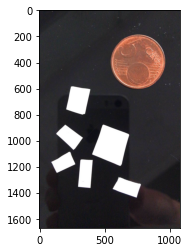

Accept: [y]  Quit: [q] y
How many samples? 6


slic data


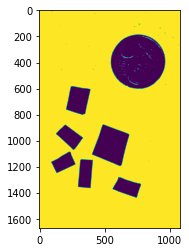

background


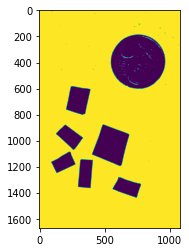

foreground


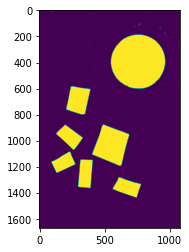

Correct? [y] y
Sample name 260nplus_r96_500C


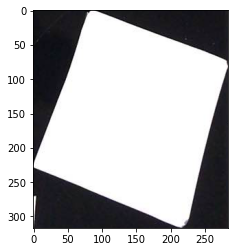

{'sample name': '260nplus_r96_500C', 'piece': 0, 'original': 'data/260nplus_r96_500C_unedited.png', 'pixels': 56383, 'ref pixels': 134658, 'region': <skimage.measure._regionprops.RegionProperties object at 0x7fa82b7276d0>}


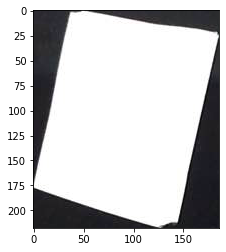

{'sample name': '260nplus_r96_500C', 'piece': 1, 'original': 'data/260nplus_r96_500C_unedited.png', 'pixels': 28935, 'ref pixels': 134658, 'region': <skimage.measure._regionprops.RegionProperties object at 0x7fa82b727d00>}


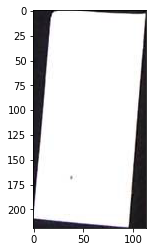

{'sample name': '260nplus_r96_500C', 'piece': 2, 'original': 'data/260nplus_r96_500C_unedited.png', 'pixels': 20266, 'ref pixels': 134658, 'region': <skimage.measure._regionprops.RegionProperties object at 0x7fa82b727190>}


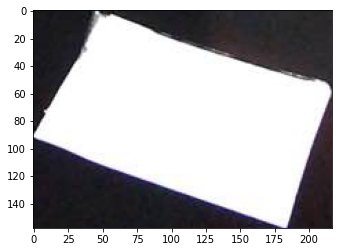

{'sample name': '260nplus_r96_500C', 'piece': 3, 'original': 'data/260nplus_r96_500C_unedited.png', 'pixels': 19573, 'ref pixels': 134658, 'region': <skimage.measure._regionprops.RegionProperties object at 0x7fa82b727310>}


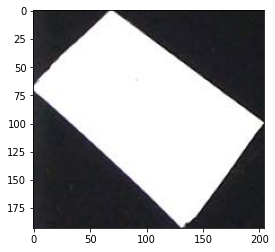

{'sample name': '260nplus_r96_500C', 'piece': 4, 'original': 'data/260nplus_r96_500C_unedited.png', 'pixels': 19291, 'ref pixels': 134658, 'region': <skimage.measure._regionprops.RegionProperties object at 0x7fa82b727cd0>}


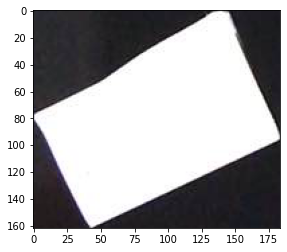

{'sample name': '260nplus_r96_500C', 'piece': 5, 'original': 'data/260nplus_r96_500C_unedited.png', 'pixels': 16117, 'ref pixels': 134658, 'region': <skimage.measure._regionprops.RegionProperties object at 0x7fa82b727df0>}


Accept? [y] y


Accepted!


In [20]:
get_samples(img = img[250:,:,:])

In [3]:
df = pd.read_pickle(datafile)
df

,original,piece,pixels,ref pixels,region,sample name
0,data/130nplus_r48_500C_unedited.png,0.0,6259.0,19689.0,<skimage.measure._regionprops.RegionProperties...,130nplus_r48_500C
1,data/130nplus_r48_500C_unedited.png,1.0,4370.0,19689.0,<skimage.measure._regionprops.RegionProperties...,130nplus_r48_500C
2,data/130nplus_r48_500C_unedited.png,2.0,4036.0,19689.0,<skimage.measure._regionprops.RegionProperties...,130nplus_r48_500C
3,data/130nplus_r48_500C_unedited.png,3.0,2337.0,19689.0,<skimage.measure._regionprops.RegionProperties...,130nplus_r48_500C
4,data/130nplus_r48_500C_unedited.png,4.0,1361.0,19689.0,<skimage.measure._regionprops.RegionProperties...,130nplus_r48_500C
...,...,...,...,...,...,...
84,data/TNO_C-305_unedited.png,1.0,36150.0,133322.0,<skimage.measure._regionprops.RegionProperties...,TNO_C-305
85,data/TNO_C-305_unedited.png,2.0,22021.0,133322.0,<skimage.measure._regionprops.RegionProperties...,TNO_C-305
86,data/TNO_C-301_unedited.png,0.0,38665.0,133120.0,<skimage.measure._regionprops.RegionProperties...,TNO_C-301
87,data/TNO_C-301_unedited.png,1.0,36038.0,133120.0,<skimage.measure._regionprops.RegionProperties...,TNO_C-301


0.0 0.8399732548210788


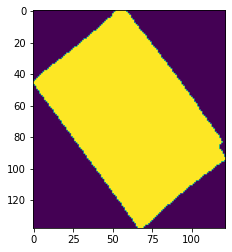

1.0 0.4052273324041775


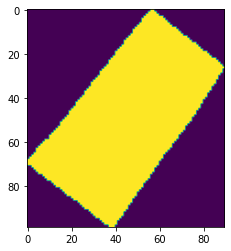

2.0 0.2012103233982052


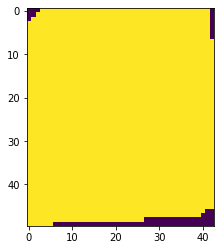

3.0 0.19056427454115726


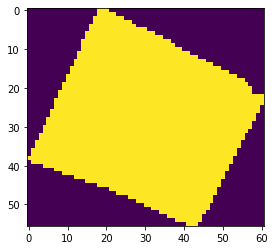

4.0 0.15911003928169762


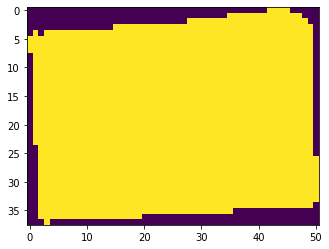

5.0 0.1486575549493233


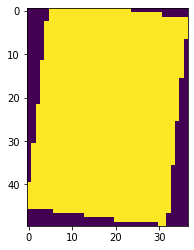

6.0 0.13868898192863302


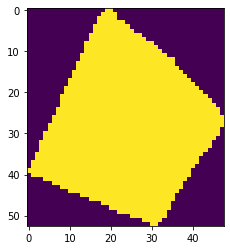

In [4]:
for i, s in df[df['sample name'] == '260nplus_r48_500C'].iterrows():
    r_coin = 20.25/20 # cm
    A_ref = np.pi*r_coin**2
    A_samp = A_ref*s['pixels']/s['ref pixels']
    print(s['piece'], A_samp)
    plt.imshow(s['region'].filled_image)
    plt.show()